Take the output from ```nluc_fpdock_test1.ipynb``` and look to see if we get a correlation with KD as expected.

In [56]:
from os import listdir
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [7]:
l = listdir("./decoys/")
fascs = []
for f in l:
    if ".fasc" in f:
        fascs.append(f)

print(fascs)

['peptide114-20210319-191812.fasc', 'peptide128-20210319-191812.fasc', 'peptide104-20210319-191812.fasc', 'peptide86-20210319-191812.fasc', 'peptide101-20210319-191812.fasc', 'native_test-20210319-191812.fasc', 'peptide99-20210319-191812.fasc', 'peptide79-20210319-191812.fasc', 'peptide78-20210319-191812.fasc']


In [22]:
data = pd.read_json("./decoys/"+fascs[0], orient='records', lines=True)

for f in fascs[1:]:
    d = pd.read_json("./decoys/"+f, orient='records', lines=True)
    data = data.append(d)

data.shape

(450, 31)

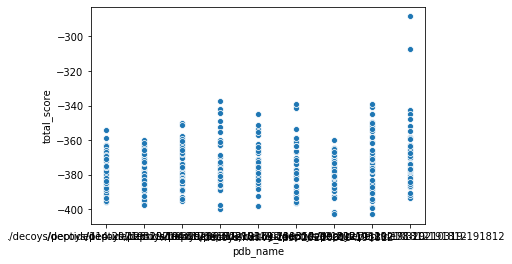

In [23]:
sn.scatterplot(x='pdb_name', y='total_score', data=data)

Now try to take only the top 10% of ```total_score```.

In [32]:
data.columns

Index(['pdb_name', 'decoy', 'filename', 'nstruct', 'angle_constraint',
       'atom_pair_constraint', 'chainbreak', 'coordinate_constraint',
       'dihedral_constraint', 'dslf_fa13', 'fa_atr', 'fa_dun', 'fa_elec',
       'fa_intra_rep', 'fa_intra_sol_xover4', 'fa_rep', 'fa_sol',
       'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'lk_ball_wtd',
       'metalbinding_constraint', 'omega', 'p_aa_pp', 'pro_close',
       'rama_prepro', 'ref', 'res_type_constraint', 'total_score',
       'yhh_planarity'],
      dtype='object')

In [43]:
peptide_names = []
for i, r in data.iterrows():
    s = r['filename'].split('-')
    s = s[0].split('/')
    name = s[2]
    peptide_names.append(name)
    
data['peptide'] = peptide_names
data.head()

,pdb_name,decoy,filename,nstruct,angle_constraint,atom_pair_constraint,chainbreak,coordinate_constraint,dihedral_constraint,dslf_fa13,...,metalbinding_constraint,omega,p_aa_pp,pro_close,rama_prepro,ref,res_type_constraint,total_score,yhh_planarity,peptide
0,./decoys/peptide114-20210319-191812,./decoys/peptide114-20210319-191812_45.pdb,./decoys/peptide114-20210319-191812_45.pdb,50,0,0,0,0,0,0,...,0,36.992090,-34.980728,1.443017,8.988627,78.30918,0,-378.834747,0.034116,peptide114
1,./decoys/peptide114-20210319-191812,./decoys/peptide114-20210319-191812_47.pdb,./decoys/peptide114-20210319-191812_47.pdb,50,0,0,0,0,0,0,...,0,36.831696,-34.822754,1.408292,8.338995,78.30918,0,-375.488688,0.037850,peptide114
2,./decoys/peptide114-20210319-191812,./decoys/peptide114-20210319-191812_9.pdb,./decoys/peptide114-20210319-191812_9.pdb,50,0,0,0,0,0,0,...,0,38.273026,-35.919489,1.398692,6.396311,78.30918,0,-377.389986,0.036818,peptide114
3,./decoys/peptide114-20210319-191812,./decoys/peptide114-20210319-191812_11.pdb,./decoys/peptide114-20210319-191812_11.pdb,50,0,0,0,0,0,0,...,0,37.607945,-35.416436,1.490095,6.235704,78.30918,0,-378.678160,0.020556,peptide114
4,./decoys/peptide114-20210319-191812,./decoys/peptide114-20210319-191812_10.pdb,./decoys/peptide114-20210319-191812_10.pdb,50,0,0,0,0,0,0,...,0,38.049247,-35.807309,1.285400,6.208295,78.30918,0,-375.230904,0.023014,peptide114


In [82]:
kds = {'peptide86':0.7E-9,
       'peptide78':3.4E-9,
       'peptide79':8.5E-9,
       'peptide99':1.8E-7,
       'peptide128':2.8E-7,
       'native_test':0.9E-6,
       'peptide104':1.3E-6,
       'peptide101':2.5E-6,
       'peptide114':1.9E-4
       }

peptides = set(data['peptide'])
dfs = []

for peptide in peptides:
    subdata = data[data['peptide']==peptide]
    subdata['kds'] = kds[peptide]
    
    stdev_total_score = np.std(subdata['total_score'])
    mean_total_score = np.mean(subdata['total_score'])
    print("{}: {} plus minus {}".format(peptide, mean_total_score, stdev_total_score))

    threshold_total_score = mean_total_score - stdev_total_score

    #dfs.append(subdata[subdata['total_score']<threshold_total_score])
    dfs.append(subdata.sort_values('total_score')[:5])

peptide114: -378.7929491142074 plus minus 9.621097749293725
peptide79: -372.99151588247156 plus minus 15.739354295893877
peptide78: -369.4774498168213 plus minus 19.05435230898246
peptide104: -375.04416954400375 plus minus 10.977606015755235
native_test: -376.49587927667665 plus minus 14.903867331143168
peptide101: -374.9218984992506 plus minus 11.031741344869197
peptide99: -380.1938306548354 plus minus 9.019295797550253
peptide128: -379.3428705384611 plus minus 9.510860886213418
peptide86: -375.2271517388557 plus minus 13.814313396765119


/home/colin/anaconda3/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [83]:
significant_structures = pd.concat(dfs)
significant_structures.shape

(45, 33)

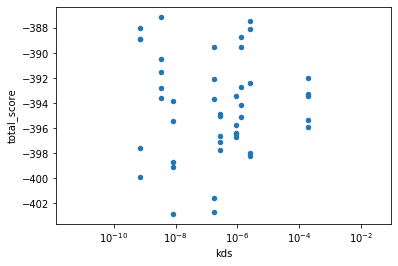

In [84]:
significant_structures.plot('kds', 'total_score', kind='scatter', logx=True)

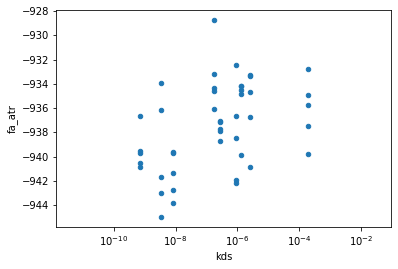

In [85]:
significant_structures.plot('kds', 'fa_atr', kind='scatter', logx=True)

In [86]:
# Try the Spearman correlation
significant_structures.corr('spearman')['kds']

nstruct                         NaN
angle_constraint                NaN
atom_pair_constraint            NaN
chainbreak                      NaN
coordinate_constraint           NaN
dihedral_constraint             NaN
dslf_fa13                       NaN
fa_atr                     0.389006
fa_dun                     0.127239
fa_elec                    0.154410
fa_intra_rep              -0.169652
fa_intra_sol_xover4       -0.163687
fa_rep                    -0.211402
fa_sol                    -0.147783
hbond_bb_sc                0.039099
hbond_lr_bb                0.108020
hbond_sc                   0.013254
hbond_sr_bb               -0.223187
lk_ball_wtd               -0.273033
metalbinding_constraint         NaN
omega                     -0.388344
p_aa_pp                    0.343942
pro_close                  0.035123
rama_prepro                0.214053
ref                       -0.333333
res_type_constraint             NaN
total_score                0.015242
yhh_planarity              0

This seems like it worked, though maybe a bit worse than the ```flexpepdock``` server. Here ```fa_atr``` is somewhat correlated. Maybe it is the score function? Maybe I need to add some constraints? Or is that happening by default?